In [126]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

# Prepare data

In [3]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
    return df

In [7]:
df = wrangle('Codsoft/archive (1)/IRIS.csv')

In [9]:
print(df.shape)
print(df.info())
print(df.head())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Explore

In [97]:
df.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


''

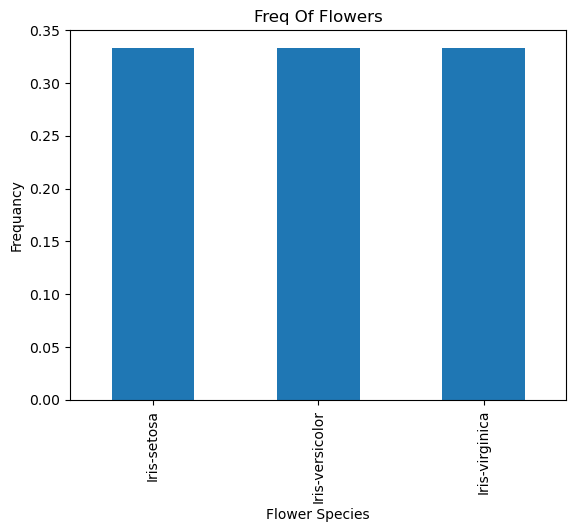

In [94]:
df['species'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Frequancy')
plt.xlabel('Flower Species')
plt.title('Freq Of Flowers')
;

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


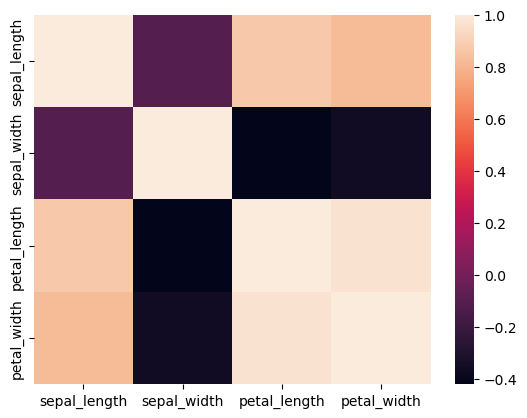

In [95]:
# check for multicollinearity 
corr = df.drop(columns='species').corr()
print(corr)
sns.heatmap(corr);

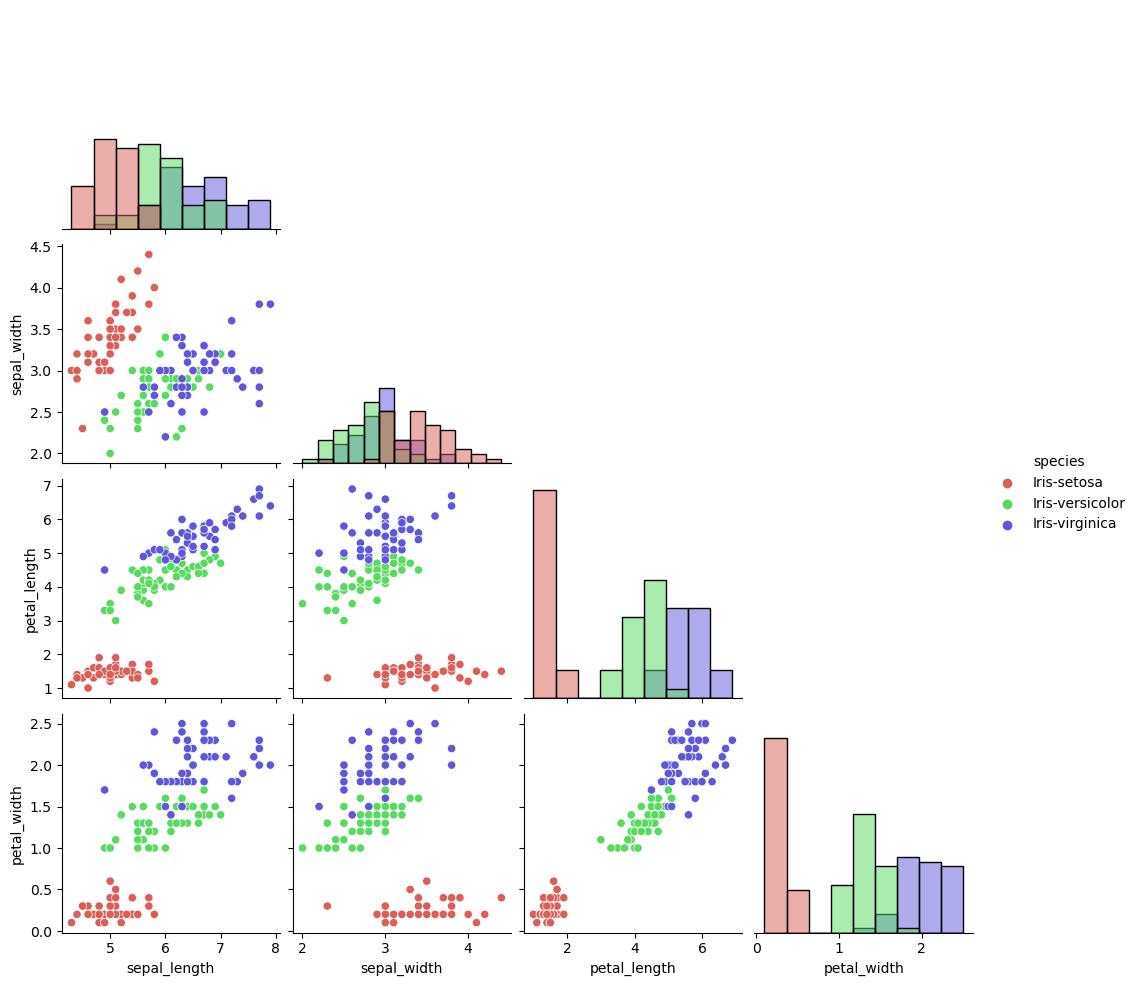

In [ ]:
sns.pairplot(df , hue='species' , diag_kind="hist" , corner=True , palette = 'hls');

# Model Building

In [40]:
# define our features and target
target = 'species'
X = df.drop(columns=target)
y= df[target]

In [60]:
# convert our target to numurical value
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [61]:
# split our data to train and test
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## Baseline Model

In [62]:
# define our baseline model
y_baselinescore = df['species'].value_counts(normalize=True)[0]
y_baselinescore

0.3333333333333333

## Iterate

In [70]:
# make our model
log = LogisticRegression(max_iter=200)
forest = RandomForestClassifier(random_state=42)
# fit our model
log.fit(X_train,y_train)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

## Evaluate

In [119]:
# get the prediction score for train data
print(f'The accuracy score for logistic Regression Model = {accuracy_score(y_train,log.predict(X_train))}')
print(f'The accuracy score for Randome Forest Classiefier = {accuracy_score(y_train,forest.predict(X_train))}')

The accuracy score for logistic Regression Model = 0.9833333333333333
The accuracy score for Randome Forest Classiefier = 1.0


In [120]:
# get the prediction score for test data
print(f'The accuracy score for logistic Regression Model = {accuracy_score(y_test,log.predict(X_test))}')
print(f'The accuracy score for Random Forest Classiefier = {accuracy_score(y_test,forest.predict(X_test))}')

The accuracy score for logistic Regression Model = 1.0
The accuracy score for Random Forest Classiefier = 1.0


In [130]:
# classification report for log model
print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [131]:
# classification report for randome forest model
print(classification_report(y_test,forest.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Communicate

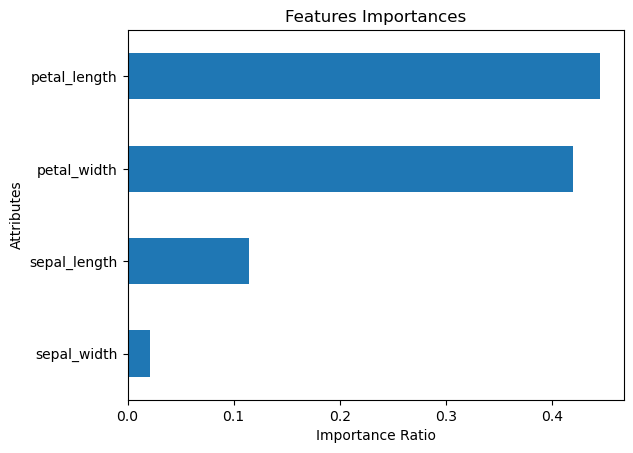

In [83]:
features = X_train.columns
# Extract importances from model
importances = forest.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail().plot(kind='barh')
plt.xlabel('Importance Ratio')
plt.ylabel('Attributes')
plt.title('Features Importances');